In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

G = 6.6743E-11

In [2]:
def findAcceleration(N, r, m):
    a = np.zeros((N, 3))
    for i in range(len(m)):
        for j in range(N):
            if (i != j):
                a[i] = G*m[j]*(r[j] - r[i]) / np.linalg.norm(r[j] - r[i])**3
    return a

def f_true(r, v, m, delta_t):
    N = 3
    acceleration_vec = findAcceleration(N, r, m)
    u_dot_r = v
    u_dot_v = acceleration_vec
    return u_dot_r, u_dot_v

def RK4(r, v, m, delta_t):
    k1_r, k1_v = f_true(r, v, m, delta_t)
    k2_r, k2_v = f_true(r + 0.5*k1_r, v + 0.5*k1_v, m, delta_t)
    k3_r, k3_v = f_true(r + 0.5*k2_r, v + 0.5*k2_v, m, delta_t)
    k4_r, k4_v = f_true(r + k3_r, v + k3_v, m, delta_t)
    return r + (delta_t / 6) * (k1_r + 2*k2_r + 2*k3_r + k4_r), v + (delta_t / 6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)

m_vec = np.array([1.9891*10**30, 6.39*10**23, 5.972E+24])      # sun, mars, earth

x_sun = np.array([0, 0, 0])
x_mars = np.array([-1.515826990639941E+08, 1.938873525772750E+08, 7.781768685378343E+06])
x_earth = np.array([-1.482478644654080E+08, -1.750593860804110E+07, 1.389212913746014E+03])
x_vec = np.array([x_sun, x_mars, x_earth])

v_sun = np.array([0, 0, 0])
v_mars = np.array([-1.817315960942974E+01, -1.286106056730962E+01, 1.762372061258093E-01])
v_earth = np.array([3.020390249534876E+00, -2.969860482268966E+01, 8.018100078537316E-04])
v_vec = np.array([v_sun, v_mars, v_earth])

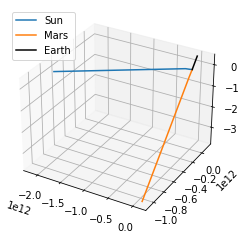

In [13]:
def orbit(x0, v0, m, t, dt):
    x = np.zeros((int(t/dt) + 1, *x0.shape))
    v = np.zeros((int(t/dt) + 1, *v0.shape))
    x[0] = x0
    v[0] = v0
    for i in range(int(t/dt)):
        x[i+1], v[i+1] = RK4(x[i], v[i], m, dt)
    return x, v

t = 2628000*12 #seconds in a year
dt = 2628000 #seconds in a month
dt_baseline = dt*10e-3
x, v = orbit(x_vec, v_vec, m_vec, t, dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:,0,0], x[:,0,1], x[:,0,2], label='Sun')
ax.plot(x[:,1,0], x[:,1,1], x[:,1,2], label='Mars')
ax.plot(x[:,2,0], x[:,2,1], x[:,2,2], label='Earth', color = 'black')
ax.legend()
plt.show()

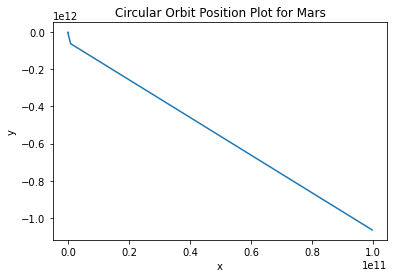

In [14]:
fig2, ax2 = plt.subplots()
ax2.plot(x[:,1,0], x[:,1,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Circular Orbit Position Plot for Mars')
plt.show()

In [15]:
def orbit_error_RK4(x0, v0, m, t, dt, dt_baseline):
    x, v = orbit(x0, v0, m, t, dt)
    # predict final state using delta_t_baseline
    x_baseline, v_baseline = orbit(x0, v0, m, t, dt_baseline)
    # calculate error
    err_x = np.linalg.norm(x[-1,:] - x_baseline[-1,:]) \
    / np.linalg.norm(x_baseline[-1,:])
    err_v = np.linalg.norm(v[-1,:] - v_baseline[-1,:]) \
    / np.linalg.norm(v_baseline[-1,:])
    return err_x, err_v

In [17]:
for x0 in x:
    for v0 in v:
        print(orbit_error_RK4(x0, v0, m_vec, t, dt, dt_baseline))

(0.6529577622174436, 0.7010029054040651)
(0.8994031441909839, 0.9819337109088827)
(0.5284564881189384, 0.5769903311930189)
(0.528457419945761, 0.5769913485138145)
(0.5284575511155857, 0.5769914917186693)
(0.5284576006411715, 0.5769915457883381)
(0.5284576264305683, 0.5769915739439766)
(0.5284576422094935, 0.5769915911706607)
(0.5284576528487319, 0.5769916027860804)
(0.5284576605043153, 0.5769916111440848)
(0.528457666275602, 0.5769916174449069)
(0.5284576707814198, 0.5769916223641443)
(0.5284576743965527, 0.5769916263109771)
(0.9626743446346647, 0.958738255106473)
(0.6771580787208562, 0.7392880581579432)
(0.39710158625872216, 0.4335709368225327)
(0.39710228758205246, 0.4335717024557429)
(0.39710238631617933, 0.43357181024410146)
(0.39710242359600134, 0.43357185094264233)
(0.39710244300888675, 0.4335718721357846)
(0.3971024548864929, 0.4335718851026261)
(0.397102462895223, 0.43357189384580097)
(0.3971024686580084, 0.43357190013706426)
(0.3971024730023922, 0.4335719048798507)
(0.39710247